# Anomaly Detection in Credit Card Transactions

#### Project Goal:

Use unsupervised learning techniques to identify potential fraudulent credit card transactions without labeled data.

## Importing all the necessary Dependencies

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

## Data Exploration

In [35]:
transaction_data = pd.read_csv("creditcard.csv")

In [36]:
# Display the first few rows of the dataset
transaction_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
# Display the shape of the dataset
transaction_data.shape

(284807, 31)

In [38]:
# Display summary statistics of the dataset
transaction_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [39]:
# Display information about the dataset
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
# Display the number of missing values in each column
transaction_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: xlabel='Amount', ylabel='Count'>

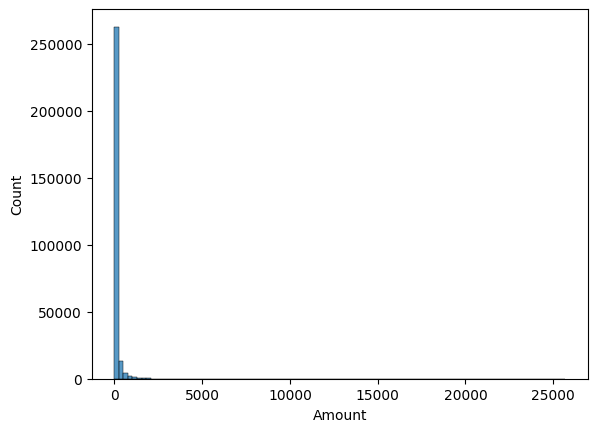

In [41]:
# Distribution Plots
sns.histplot(data=transaction_data, x="Amount", bins=100)

<Axes: xlabel='Amount', ylabel='Count'>

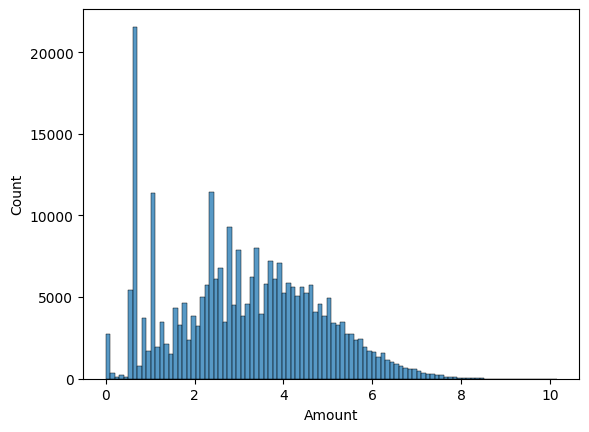

In [42]:
sns.histplot(np.log1p(transaction_data['Amount']), bins=100)

<Axes: xlabel='Time', ylabel='Count'>

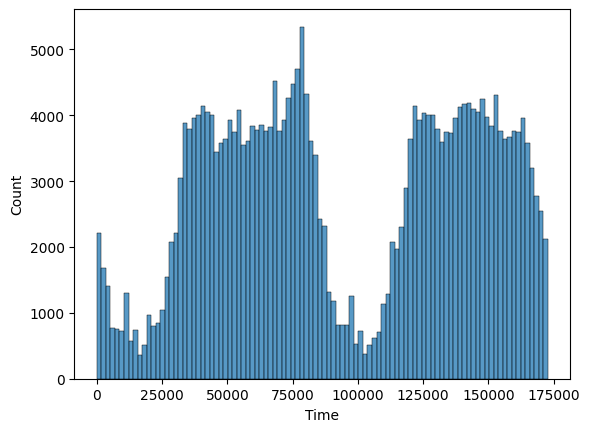

In [43]:
sns.histplot(data=transaction_data, x="Time", bins=100)

<Axes: xlabel='Amount'>

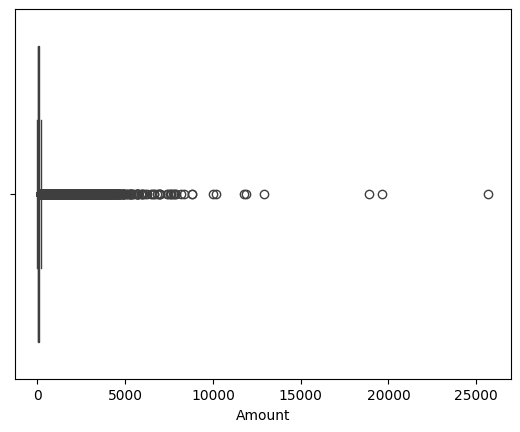

In [44]:
#check for outliers
sns.boxplot(x=transaction_data['Amount'])

<Axes: xlabel='Class', ylabel='count'>

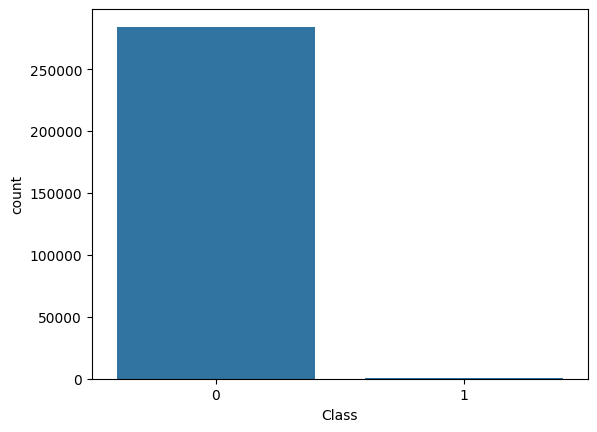

In [45]:
sns.countplot(x="Class", data=transaction_data)

In [51]:
print(transaction_data['Class'].value_counts())
print("percentage of fraudulent transactions: {:.2f}%".format(492/284315*100))

Class
0    284315
1       492
Name: count, dtype: int64
percentage of fraudulent transactions: 0.17%


The dataset is highly imbalanced, with the vast majority of transactions labeled as normal (Class 0), and only a very small percentage labeled as fraud (Class 1). This class imbalance must be taken into account when evaluating the model’s performance.

<Axes: xlabel='V14', ylabel='Density'>

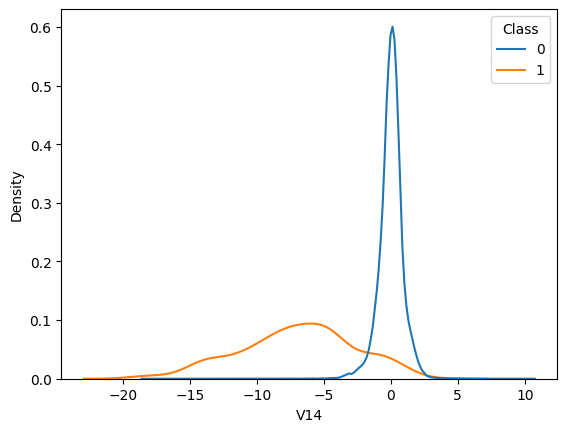

In [46]:
sns.kdeplot(data=transaction_data, x="V14", hue="Class", common_norm=False)

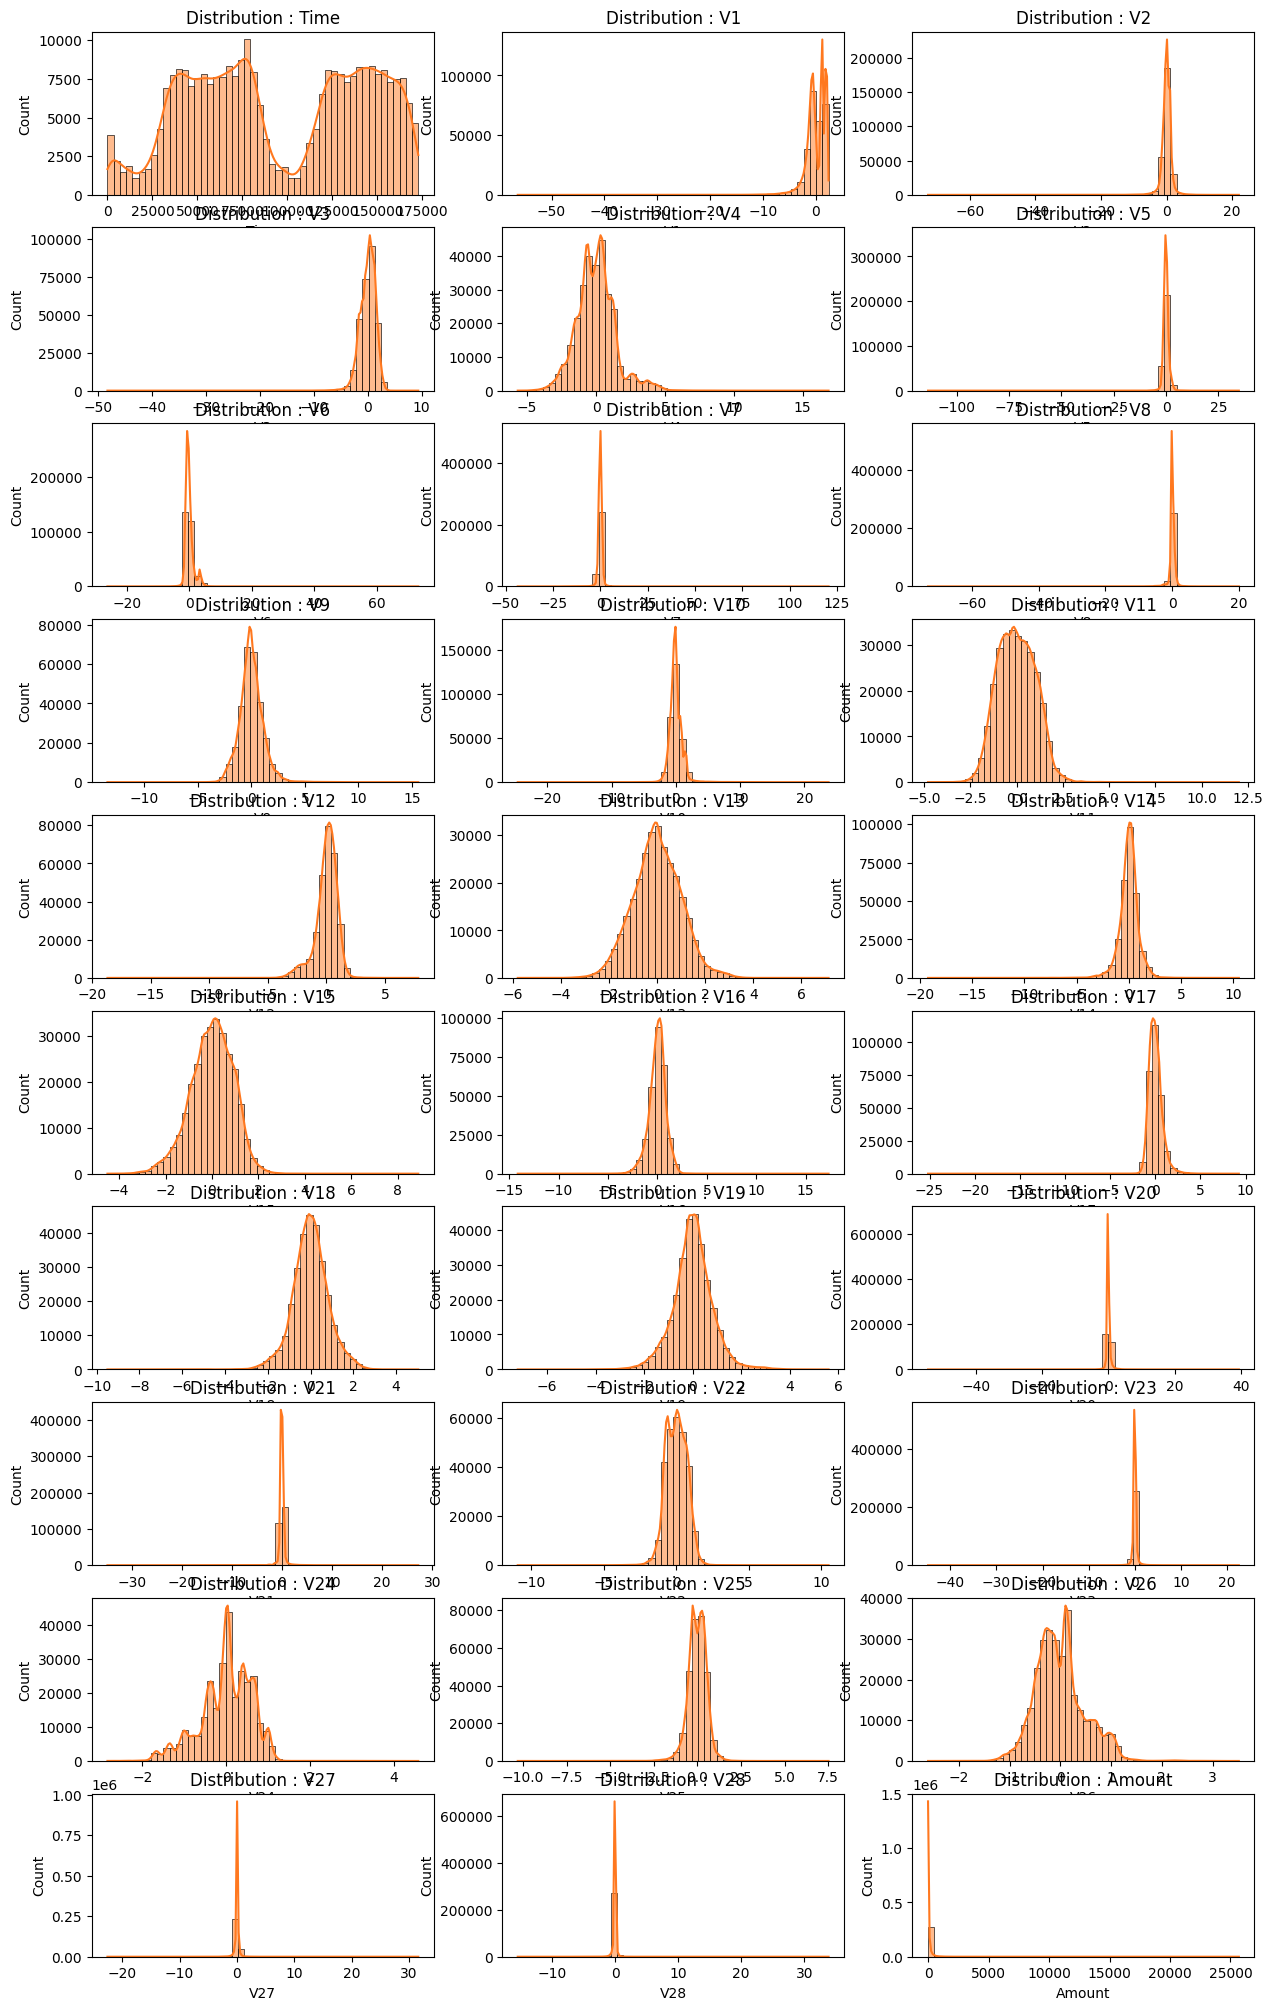

In [47]:
fig, ax = plt.subplots(nrows = 10,ncols = 3,figsize = (15,25))
colors = ['#FF781F','#2D2926']
numerical_features = transaction_data.columns[:-1]  # Exclude the 'Class' column
for i in range(len(numerical_features)):
    plt.subplot(10,3,i+1)
    sns.histplot(transaction_data[numerical_features[i]], color=colors[0], bins=50, kde=True)    
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

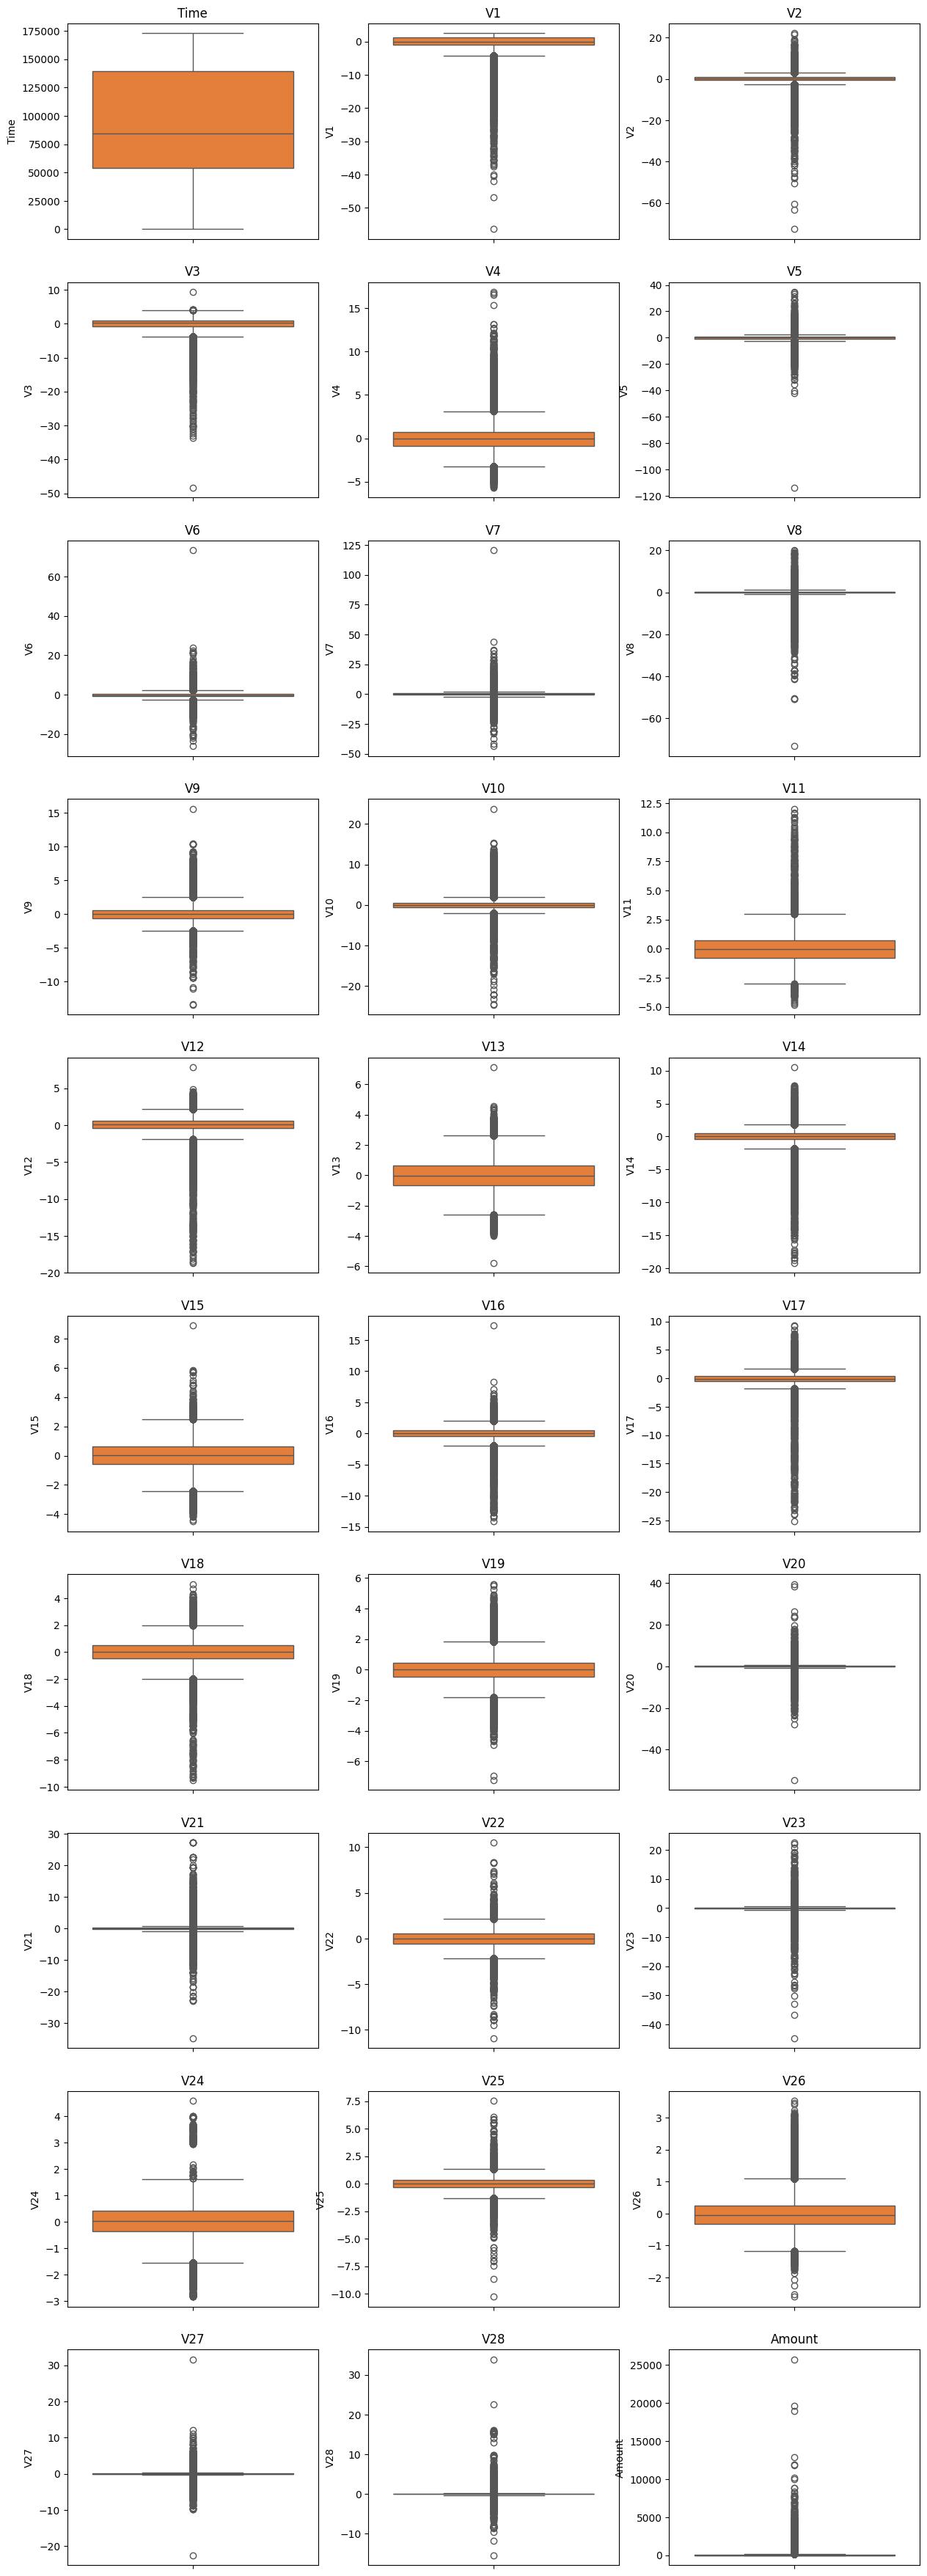

In [48]:
fig  = plt.subplots(nrows = 10,ncols = 3,figsize = (15,45))
for i in range(len(numerical_features)):
    plt.subplot(10,3,i+1)
    ax = sns.boxplot(transaction_data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

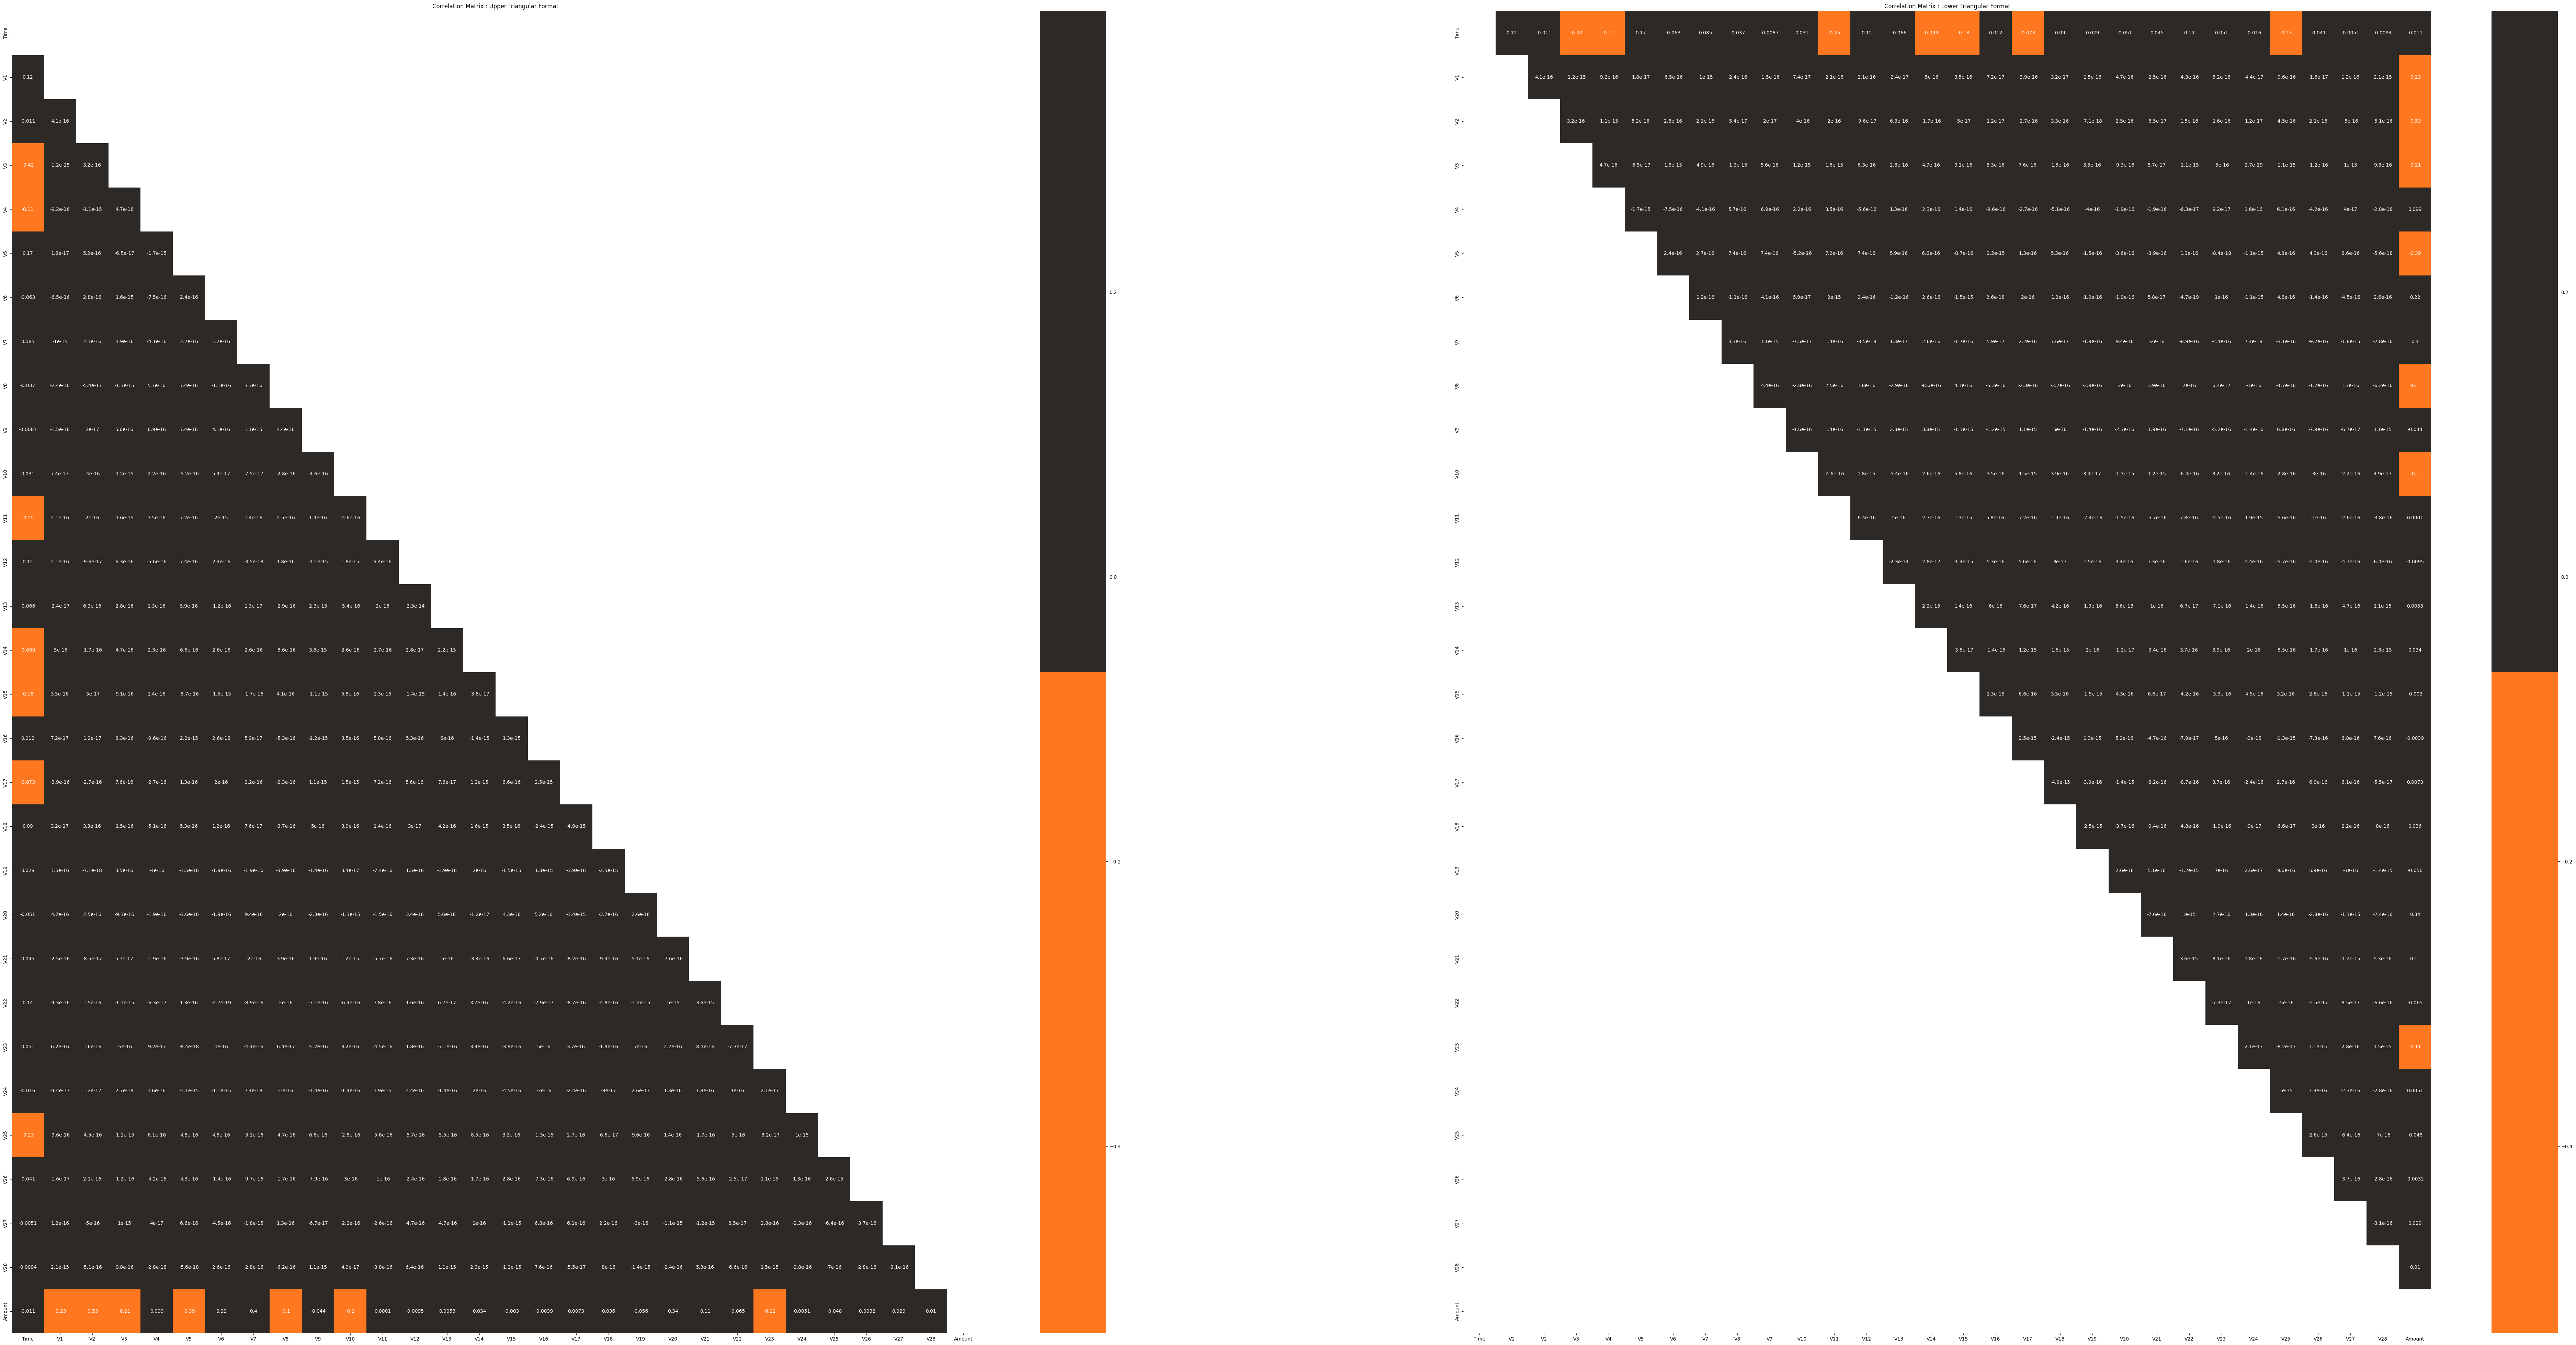

In [59]:
data_without_Class = transaction_data.copy()
data_without_Class = data_without_Class.drop(labels=['Class'], axis=1)
ut = np.triu(data_without_Class.corr())
lt = np.tril(data_without_Class.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (100,50))
plt.subplot(1,2,1)
sns.heatmap(data_without_Class.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(data_without_Class.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

Most features show negligible correlation, but a few pairs have moderate correlation (0.2 to 0.5), indicating mostly independent features with some related ones.

### Conclusions:
- The dataset is extremely imbalanced, with only 0.17% fraud cases. This means accuracy alone won't be helpful, we need to focus on metrics like recall and precision when evaluating models.

- From the boxplots, almost all features (except Time) contain many outliers, which is expected in a fraud detection dataset. Fraudulent transactions often appear as extreme or unusual values, which is what anomaly detection methods rely on.

- Feature scaling is important here, especially since most unsupervised models are sensitive to outliers and different feature ranges.

- The Time feature shows no major outliers and may not be very useful for detecting fraud, while other features (like V's) could be more informative.

## Preprocessing

In [16]:
#Separate the label from the features
X = transaction_data.drop("Class", axis=1)   # X = features only
y = transaction_data["Class"]   
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
# Scale 'Time' and 'Amount'
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [ ]:
# This didnt work \ took a long time
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X) 

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=2)
plt.title('t-SNE visualization of transactions')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

## Unsupervised Techniques

In [18]:
# Initialize Isolation Forest with contamination set to estimated fraud rate
iso_forest = IsolationForest(contamination=0.0017, random_state=42)

In [19]:
# Fit the model on scaled features
iso_forest.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.0017
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [26]:
#predict anomalies
y_pred = iso_forest.predict(X)
y_pred

In [27]:
# Convert predictions to 0 (normal) and 1 (fraud)
y_pred_adjusted = [1 if val == -1 else 0 for val in y_pred]
y_pred_adjusted

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [34]:
print("Isolation Forest Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y, y_pred_adjusted, digits=4))

Isolation Forest Evaluation
Confusion Matrix:
 [[283955    360]
 [   367    125]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    284315
           1     0.2577    0.2541    0.2559       492

    accuracy                         0.9974    284807
   macro avg     0.6282    0.6264    0.6273    284807
weighted avg     0.9974    0.9974    0.9974    284807



### Evaluation Summary (Isolation Forest):

The model achieved very high accuracy (~99.74%), but due to the extreme class imbalance, accuracy is not a meaningful metric here.
Instead, we focus on how well the model detects the minority class (fraud).

- Precision (fraud): 25.8% – Only about 1 in 4 flagged transactions were actually fraud. This indicates a relatively high false positive rate.

- Recall (fraud): 25.4% – The model detected about 1 in 4 of the actual fraud cases. This is modest and could be improved.

- F1-Score (fraud): 25.6% – Low overall performance on fraud, but a solid starting point for an unsupervised approach.

Despite being unsupervised and never seeing fraud labels during training, Isolation Forest was able to catch a portion of the fraud cases.

## Insights

The model struggled to capture most fraudulent transactions, likely because of:

- Extreme imbalance (fraud = 0.17% of data) ()

- Some fraud patterns might be too subtle or look "normal"

- Isolation Forest was easy and fast to implement, and required no label information, which is ideal for real-world situations with limited labeled data.

- However, the low recall and precision suggest it needs improvement or combination with other techniques.

- This model gives a starting point. These resultsmay be used to see if other models, like Autoencoders or One-Class SVM, can do a better job.

In real-world applications (e.g., banking), recall is often more important, missing fraud can cost more than a false alarm.